In [30]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [31]:
df_X = diabetes.data
df_y = diabetes.target

In [32]:
import numpy as np

X = np.array(df_X)
y = np.array(df_y)

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=53)

In [34]:
# Define model function
def model(X, W, b):
    predictions = X.dot(W) + b
    return predictions

In [35]:
# Define MSE function
def MSE(a, b):
    mse = ((a - b) ** 2).mean()
    return mse

In [36]:
# Define loss function
def loss(X, W, b, y):
    pred = model(X, W, b)
    L = MSE(pred, y)
    return L

In [37]:
# Define gradient function
def gradient(X, W, b, y):
    N = len(y)
    y_pred = model(X, W, b)
    dW = (2/N) * X.T.dot(y_pred - y)
    db = 2 * (y_pred - y).mean()
    return dW, db

In [38]:
import pandas as pd

# Find correlation coefficient of each features
feature_names = diabetes.feature_names
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

correlations = df.corr()['target'].drop('target')

print(correlations.sort_values(ascending=False))

bmi    0.586450
s5     0.565883
bp     0.441484
s4     0.430453
s6     0.382483
s1     0.212022
age    0.187889
s2     0.174054
sex    0.043062
s3    -0.394789
Name: target, dtype: float64


In [39]:
# Delete less correlation coeffecient features
features_to_remove = ['sex', 's2', 'age']

X_df_train = pd.DataFrame(X_train, columns=feature_names)
X_df_test = pd.DataFrame(X_test, columns=feature_names)

X_df_train_filtered = X_df_train.drop(columns=features_to_remove)
X_df_test_filtered = X_df_test.drop(columns=features_to_remove)

X_train = X_df_train_filtered.to_numpy()
X_test = X_df_test_filtered.to_numpy()

In [40]:
# Select learning rate
lr = 0.1

# Set loss array and random W, b
losses = []
W = np.random.rand(len(X_train[0]))
b = np.random.rand()

# Learning...
for i in range(1, 20001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= lr * dW
    b -= lr * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 50 == 0:
        print('Iteration %d: Loss %0.4f' % (i, L))

Iteration 50: Loss 5616.1471
Iteration 100: Loss 5307.7659
Iteration 150: Loss 5040.5140
Iteration 200: Loss 4808.7335
Iteration 250: Loss 4607.5510
Iteration 300: Loss 4432.7683
Iteration 350: Loss 4280.7691
Iteration 400: Loss 4148.4377
Iteration 450: Loss 4033.0897
Iteration 500: Loss 3932.4122
Iteration 550: Loss 3844.4119
Iteration 600: Loss 3767.3713
Iteration 650: Loss 3699.8096
Iteration 700: Loss 3640.4506
Iteration 750: Loss 3588.1939
Iteration 800: Loss 3542.0907
Iteration 850: Loss 3501.3226
Iteration 900: Loss 3465.1838
Iteration 950: Loss 3433.0650
Iteration 1000: Loss 3404.4408
Iteration 1050: Loss 3378.8573
Iteration 1100: Loss 3355.9227
Iteration 1150: Loss 3335.2986
Iteration 1200: Loss 3316.6923
Iteration 1250: Loss 3299.8512
Iteration 1300: Loss 3284.5564
Iteration 1350: Loss 3270.6188
Iteration 1400: Loss 3257.8744
Iteration 1450: Loss 3246.1814
Iteration 1500: Loss 3235.4166
Iteration 1550: Loss 3225.4732
Iteration 1600: Loss 3216.2586
Iteration 1650: Loss 3207.69

Iteration 15100: Loss 2989.8245
Iteration 15150: Loss 2989.7887
Iteration 15200: Loss 2989.7533
Iteration 15250: Loss 2989.7181
Iteration 15300: Loss 2989.6833
Iteration 15350: Loss 2989.6487
Iteration 15400: Loss 2989.6144
Iteration 15450: Loss 2989.5804
Iteration 15500: Loss 2989.5466
Iteration 15550: Loss 2989.5131
Iteration 15600: Loss 2989.4799
Iteration 15650: Loss 2989.4469
Iteration 15700: Loss 2989.4142
Iteration 15750: Loss 2989.3818
Iteration 15800: Loss 2989.3495
Iteration 15850: Loss 2989.3176
Iteration 15900: Loss 2989.2858
Iteration 15950: Loss 2989.2543
Iteration 16000: Loss 2989.2231
Iteration 16050: Loss 2989.1920
Iteration 16100: Loss 2989.1612
Iteration 16150: Loss 2989.1306
Iteration 16200: Loss 2989.1003
Iteration 16250: Loss 2989.0701
Iteration 16300: Loss 2989.0402
Iteration 16350: Loss 2989.0105
Iteration 16400: Loss 2988.9809
Iteration 16450: Loss 2988.9516
Iteration 16500: Loss 2988.9225
Iteration 16550: Loss 2988.8936
Iteration 16600: Loss 2988.8649
Iteratio

In [41]:
# Check the performance
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
print(mse)

2962.411324138264


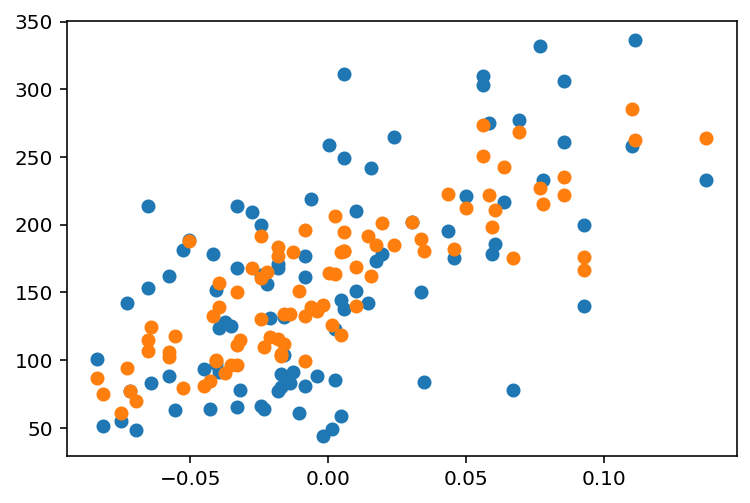

In [42]:
import matplotlib.pyplot as plt

%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()